# **Student Performance**

This project aims to analyze students' academic performance and predict their final grade (G3) as a function of different explanatory variables such as academic engagement, work habits and social factors.
 
The dataset used comes from the **UCI Machine Learning Repository** and is available at the following address:
*https://archive.ics.uci.edu/dataset/320/student+performance*

This dataset contains information on students in two courses (Mathematics and Portuguese) in a secondary school in Portugal. It includes 33 variables covering academic, socio-economic and behavioral aspects. 
 
The aim of this study is to explore these variables in order to understand the factors influencing academic performance and to build predictive models to help identify students at risk of failure.
 
We will take the following steps:
1. **Data loading and Creation of a Test Set**
2. **Data Exploration**
3. **Feature Engineering**
4. **Exploration of some models**
5. **Optimization**
6. **Evaluation and Analysis of results**

# 1. Load data and create test set

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [1610]:
# Data mathematics
data_mat = pd.read_csv("student-mat.csv", delimiter=";")
data_mat_original = data_mat.copy()

In [1612]:
# Data Portuguese
data_por = pd.read_csv("student-por.csv", delimiter=";")
data_por_original = data_por.copy()
#data_por.head(5)

In [1614]:
target_mat = data_mat[["G3"]].copy()
target_mat.head(5)

,G3
0,6
1,6
2,10
3,15
4,10


In [1616]:
target_por = data_por[["G3"]].copy()
target_por.head(5)

,G3
0,11
1,11
2,12
3,14
4,13


In [1618]:
data_por = data_por.drop(["G3"], axis=1)
data_mat = data_mat.drop(["G3"], axis=1)

In [1622]:
# We split our data into a training set and a test set.
# We will explore the train set and optimize our models on it and then we will only use the test set to evaluate our models at the end
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(data_mat, target_mat, test_size=0.2, random_state=42)
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(data_por, target_por, test_size=0.2, random_state=42)

# 2. Data Exploration

In this section we are going to do the exploration of our train set about the portugese course.

The resume of this Data Exploration is located at the end of this section.

In [1626]:
# We make a copy of ou data so we don't modify the training set
data_por_original = X_train_por.copy()
data_por_original["G3"] = y_train_por
data_mat_original = X_train_mat.copy()
data_mat_original["G3"] = y_train_mat

In [1628]:
# We check if there are missing values
print(f"Mat : {data_mat_original.isna().any().any()} , Por :  {data_por_original.isna().any().any()}")

Mat : False , Por :  False


There are no missing values inside this Dataset

In [16]:
data_mat_original.dtypes.value_counts()

object    17
int64     16
Name: count, dtype: int64

In [17]:
data_por_original.dtypes.value_counts()

object    17
int64     16
Name: count, dtype: int64

We got 17 objetcs columns and 16 numeric columns

In [20]:
# Both data set got the same columns
print(data_mat_original.columns == data_por_original.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [22]:
print(data_mat_original.shape, data_por_original.shape)

(316, 33) (519, 33)


In [1632]:
g3_por= y_train_por >= 10
g3_mat = y_train_mat >= 10

In [1634]:
g3_por.value_counts(normalize=True)

G3   
True     0.836224
False    0.163776
Name: proportion, dtype: float64

As we can see we got 83% of student that passed the final exam in the Portuguese class

In [25]:
def plotTarget(data):
    """
    Function to plot the target
    """
    test = data.value_counts().reset_index()
    sns.barplot(x=test.iloc[:,0], y=test.iloc[:,1])
    plt.ylabel("Count")
    plt.xlabel("Grades")
    plt.show()

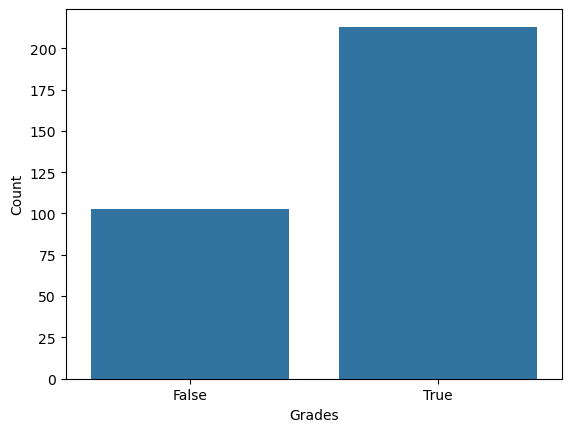

In [26]:
plotTarget(g3_mat)

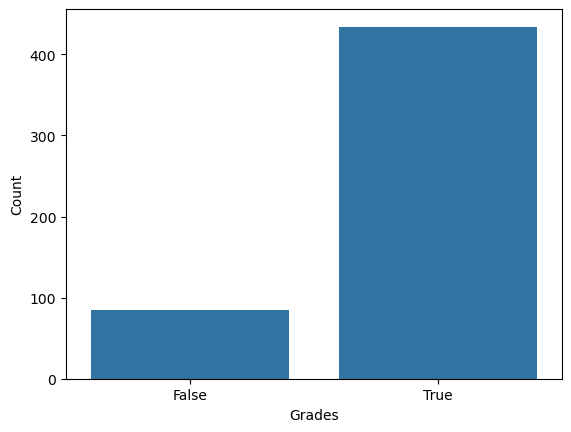

In [27]:
plotTarget(g3_por)

**Numeric Features**

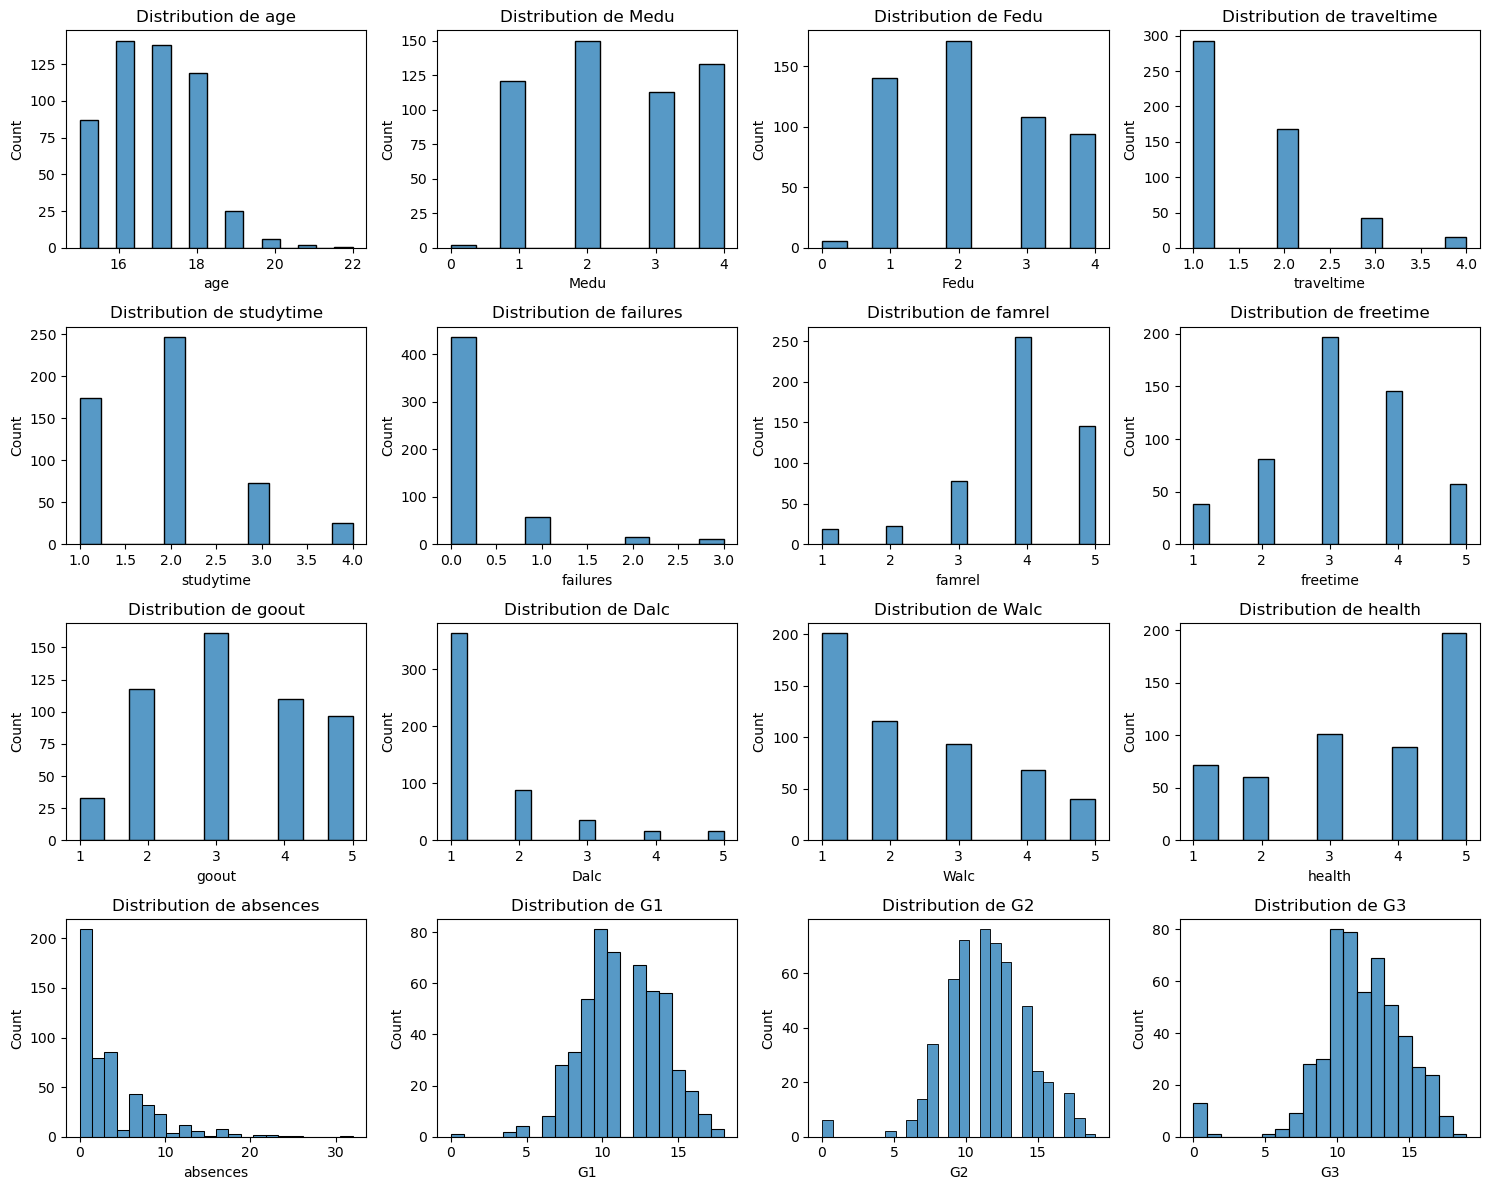

In [29]:
n_rows = 4
n_col = 4
fig, axes = plt.subplots(n_rows, n_col, figsize=(15, 12))
axes = axes.flatten()  # Aplatir les axes pour itérer facilement
for i, col in enumerate(data_por_original.select_dtypes('int64')):
    sns.histplot(data_por_original[col], ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
fig.tight_layout()
plt.show()

In [1637]:
def getPercentage(col, val):
    """
    Function that returns the % of student that passed the final exam depending on a value val of the column col
    """
    age_data = data_por_original[data_por_original[col] == val]
    percentage = (age_data["G3"] >= 10).mean() * 100
    count = (age_data["G3"] >= 10).sum()
    return percentage, count

In [1641]:
def analyseFeature_Target(featureType): 
    study_por = data_por_original.copy()
    study_por = study_por.drop(["G3"], axis=1)
    passed = (data_por_original["G3"] >= 10).astype(int)
    custom_palette = {0: "red", 1: "green"} 
    n_rows = 4
    n_col = 4
    
    for i, col in enumerate(study_por.select_dtypes(featureType)):
        plt.figure(figsize=(5,3))
        sns.histplot(data=study_por, x=col, hue=passed, palette=custom_palette)
        unique_vals = study_por[col].unique()
    
        # We make annotations for each categorie
        for val in unique_vals:
            # We get the percentage from our function
            per, cnt = getPercentage(col, val)
    
            # We calculate the x and y position of the annotation
            x_position = val
            y_position = cnt + 2  
    
            # We print the annotation
            plt.text(x_position, y_position, f"{round(per, 1)}%", ha='center', va='bottom', fontsize=6, color="black")
            plt.title(f"Distribution de {col}")
        plt.show()
        
    fig.tight_layout()


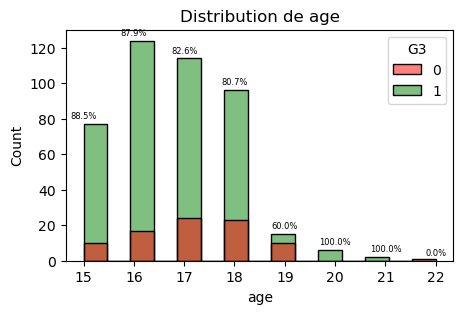

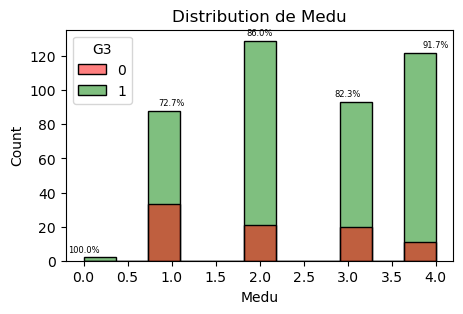

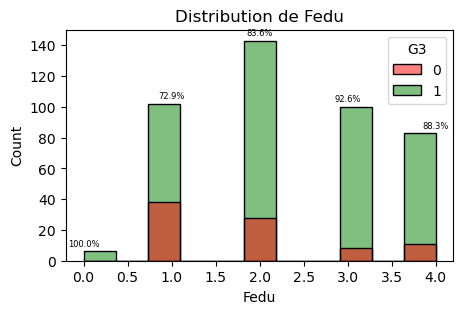

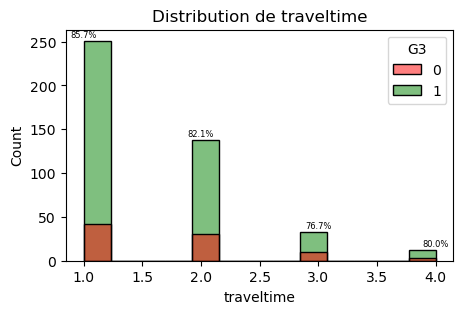

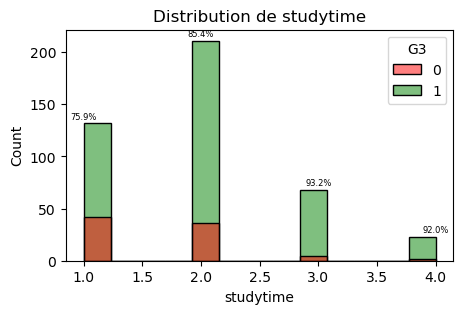

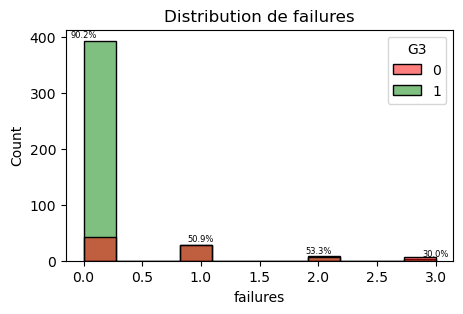

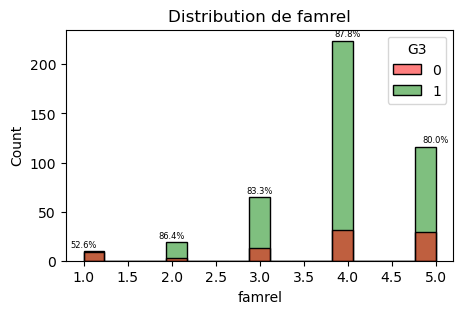

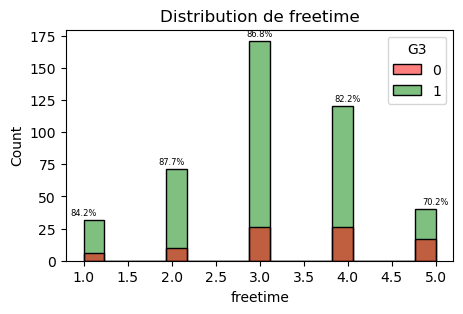

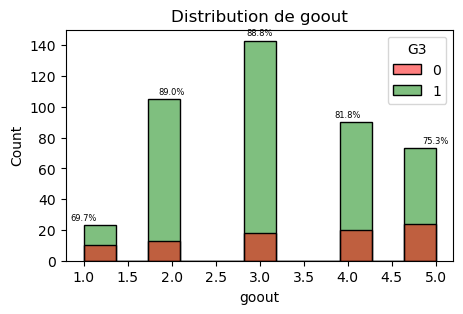

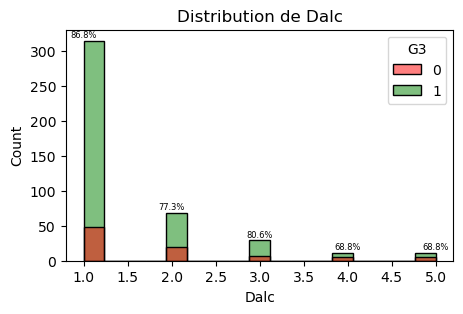

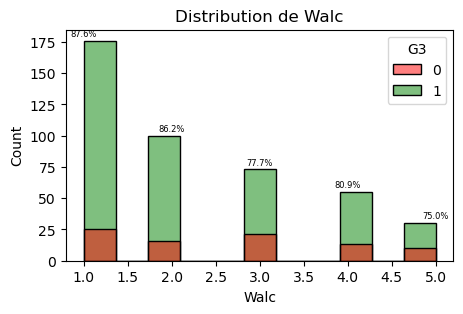

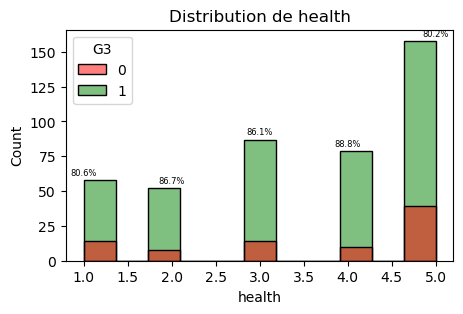

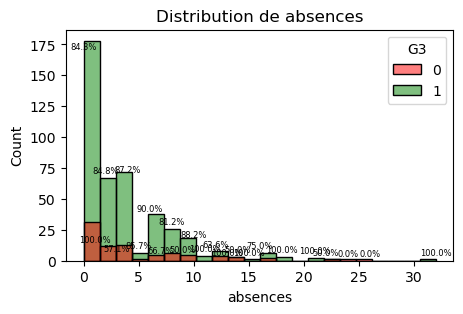

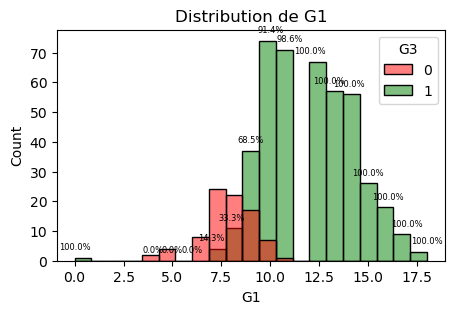

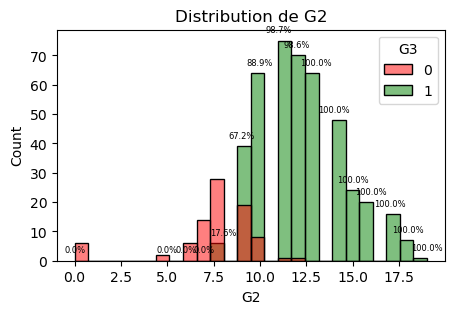

In [1643]:
analyseFeature_Target('int64')

In [32]:
# This seems a reasonable better way to express the feature Absences in comparison to the target Passed the exam or not
filtered_df = pd.DataFrame({
    'Absences': data_por_original['absences'] > 10,
    'G3': data_por_original['G3'] >= 10
})
filtered_df["G3"].groupby(filtered_df["Absences"]).value_counts(normalize=True).reset_index()

,Absences,G3,proportion
0,False,True,0.847280
1,False,False,0.152720
2,True,True,0.707317
3,True,False,0.292683


In [33]:
# This seems a reasonable better way to express the feature Age in comparison to the target Passed the exam or not
filtered_df = pd.DataFrame({
    'Age': data_por_original['age'] <= 18,
    'G3': data_por_original['G3'] >= 10
})
filtered_df["G3"].groupby(filtered_df["Age"]).value_counts(normalize=True).reset_index()

,Age,G3,proportion
0,False,True,0.676471
1,False,False,0.323529
2,True,True,0.847423
3,True,False,0.152577


Categoric features

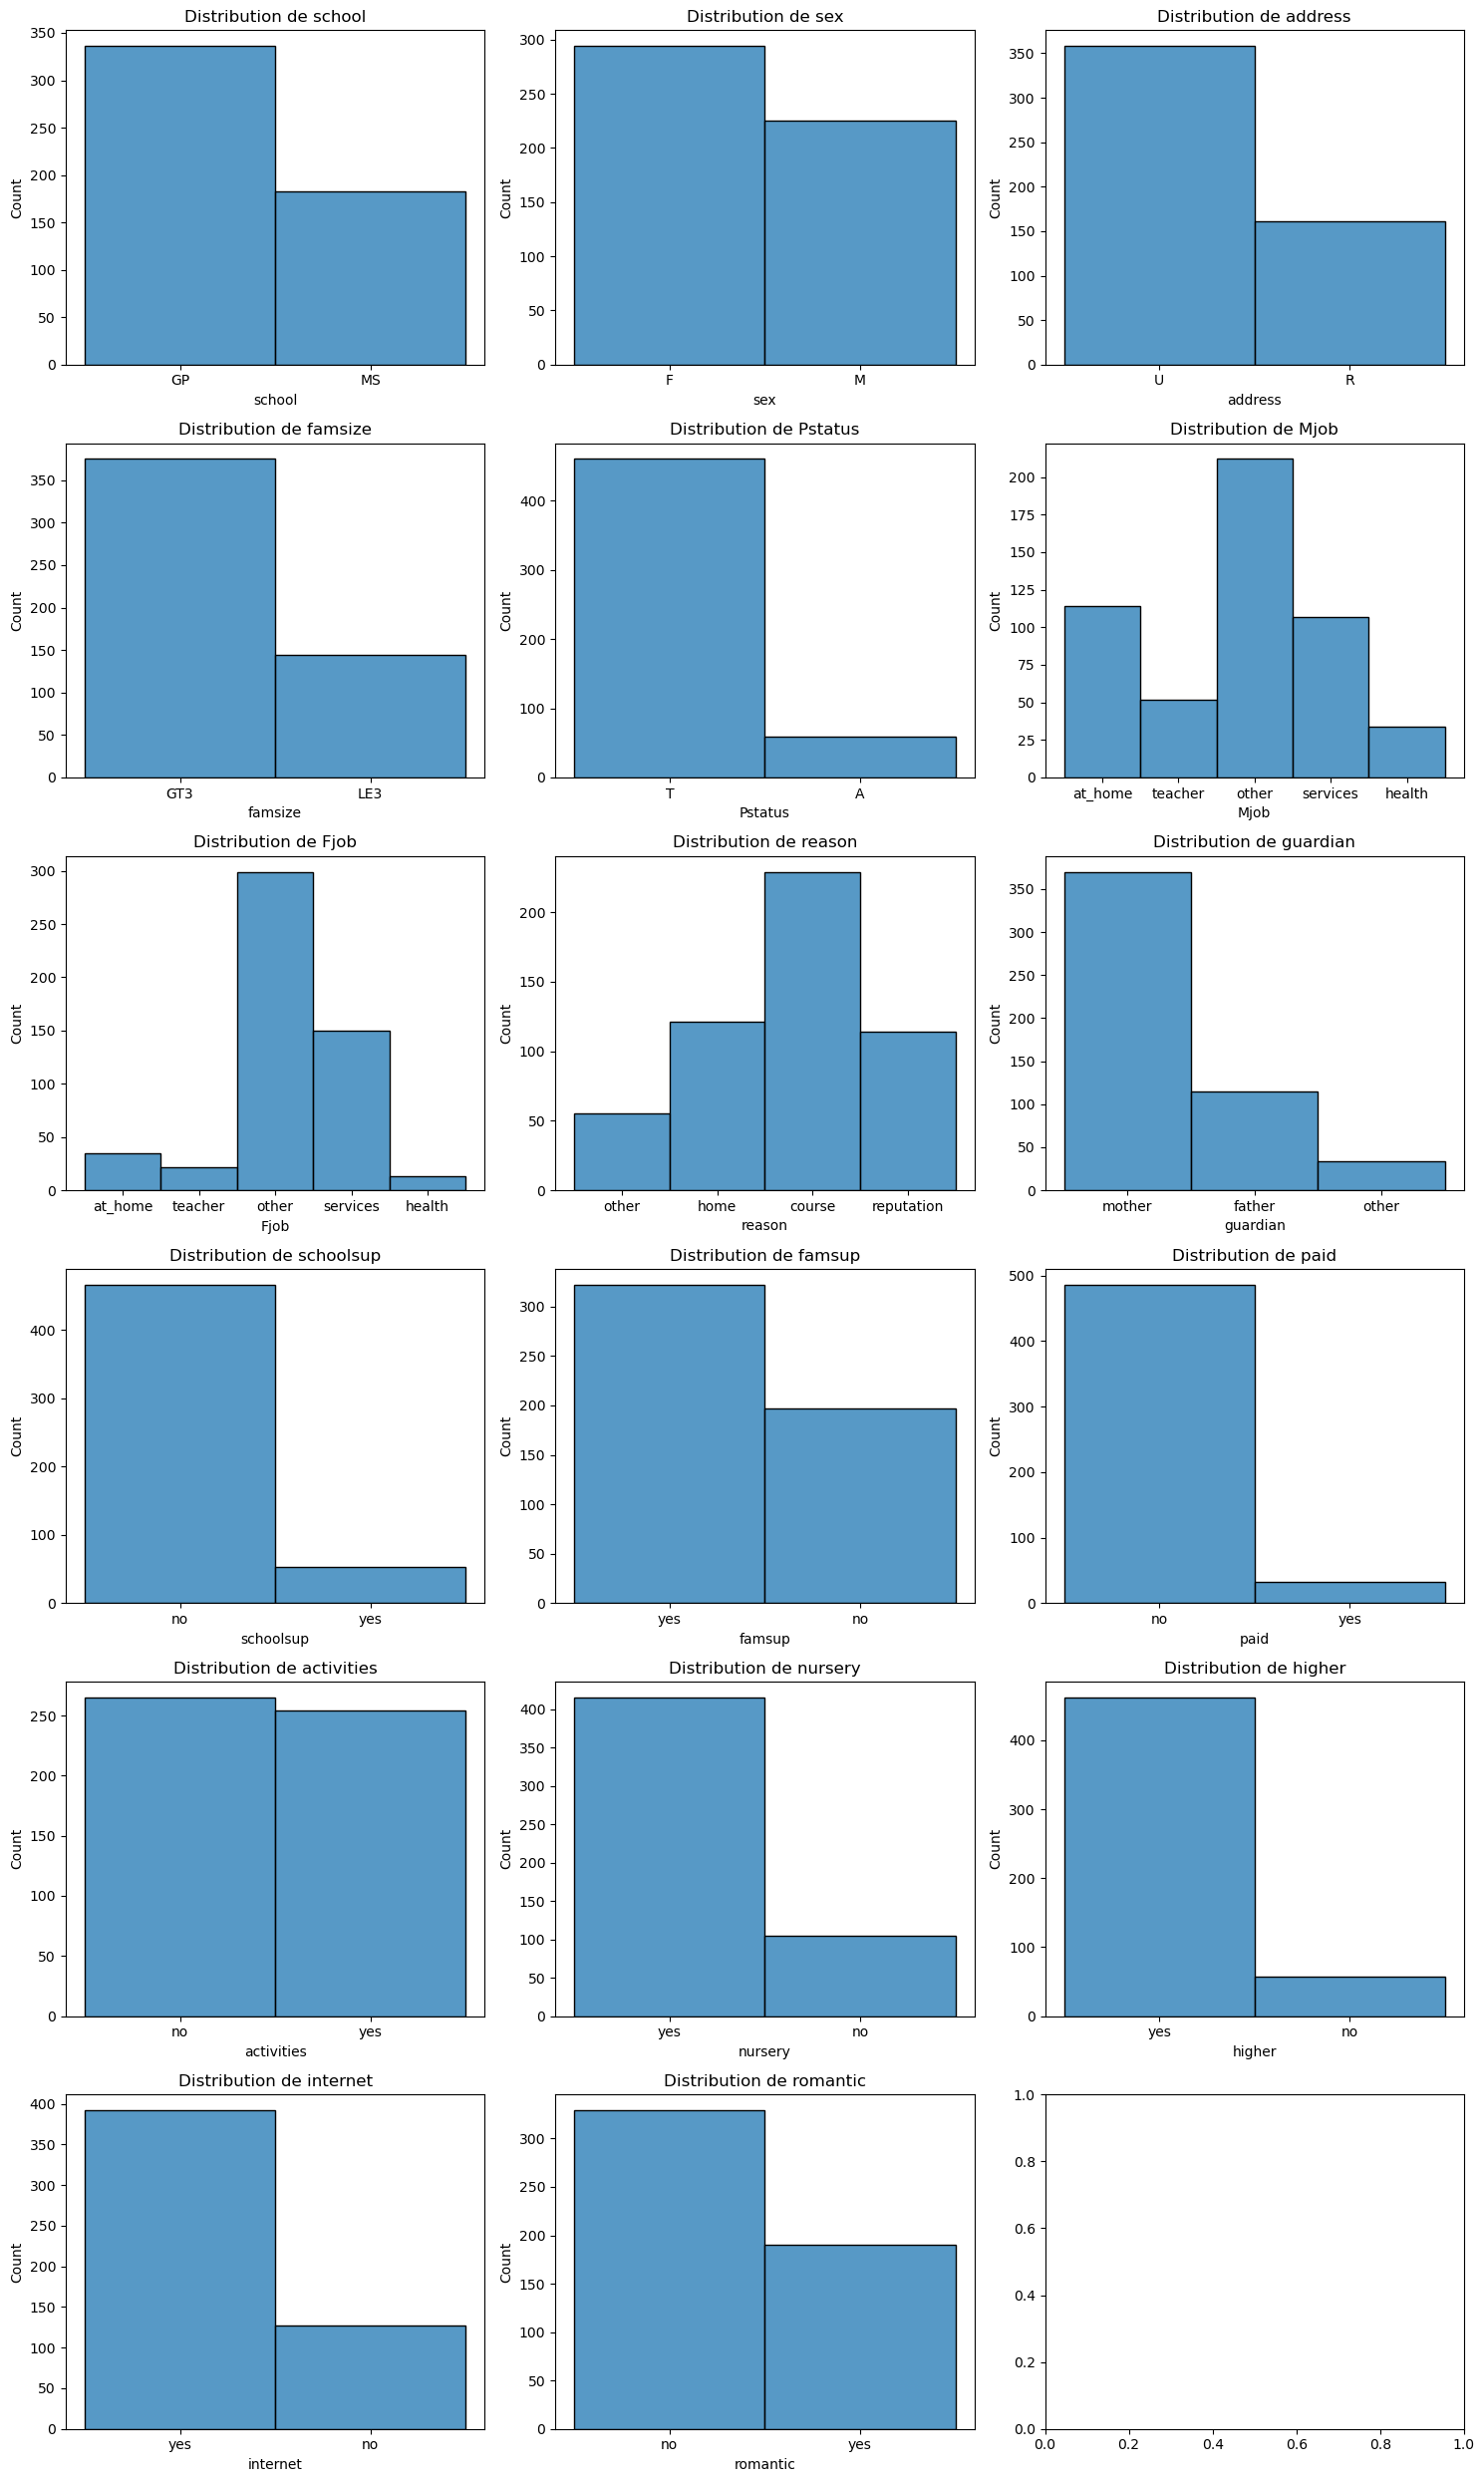

In [35]:
n_rows = 6
n_col = 3
fig, axes = plt.subplots(n_rows, n_col, figsize=(15, 25))
axes = axes.flatten()  # Aplatir les axes pour itérer facilement
for i, col in enumerate(data_por_original.select_dtypes('object')):
    sns.histplot(data_por_original[col], ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
fig.tight_layout()
plt.show()

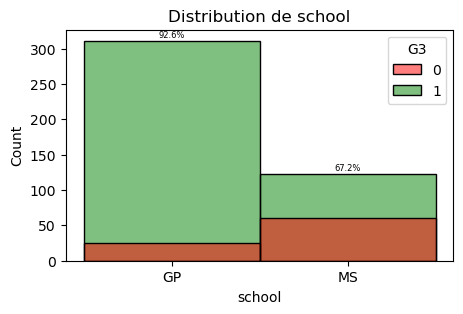

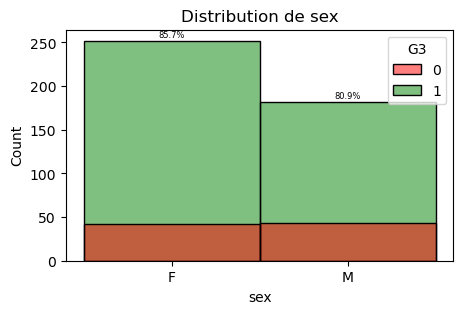

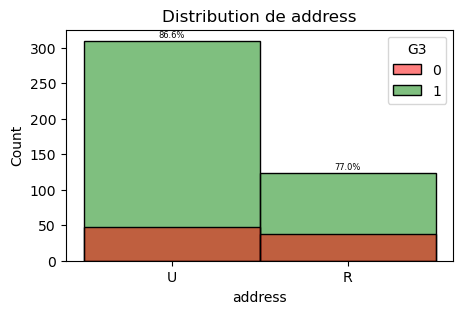

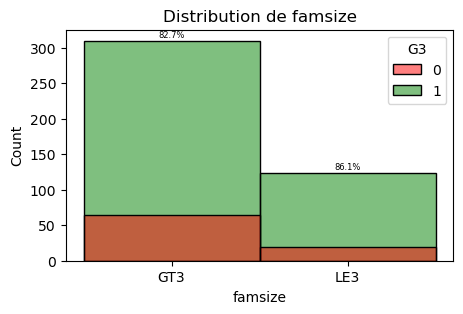

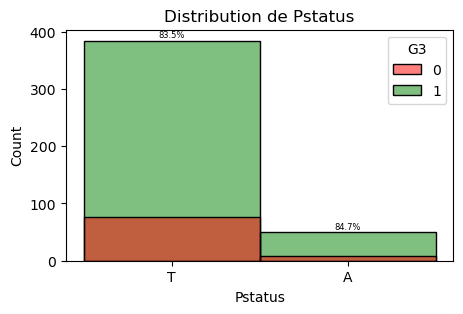

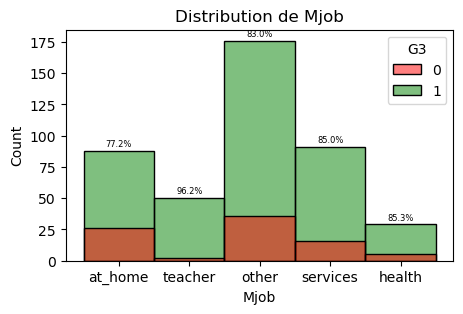

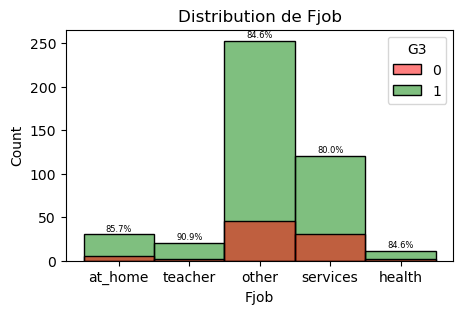

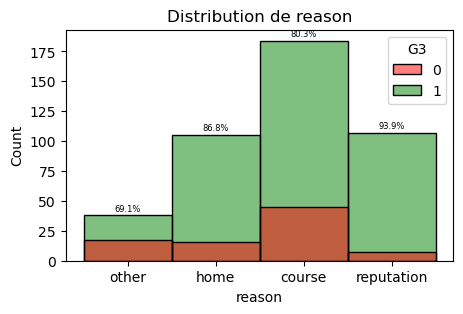

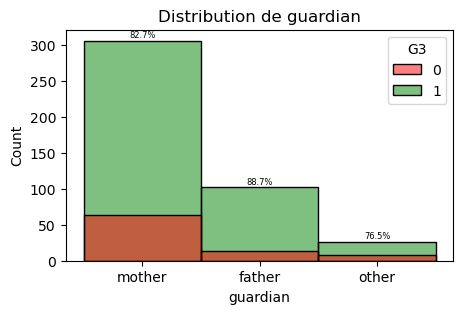

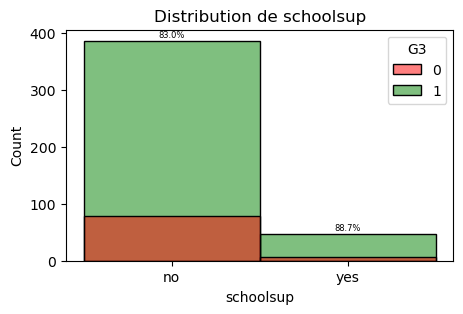

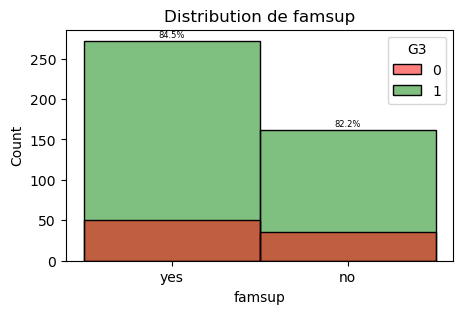

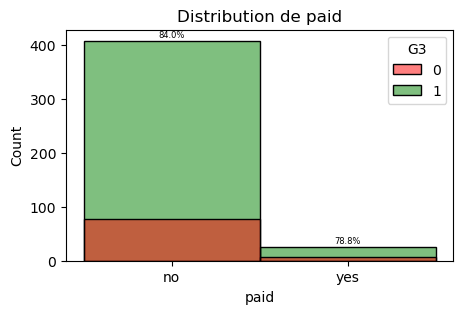

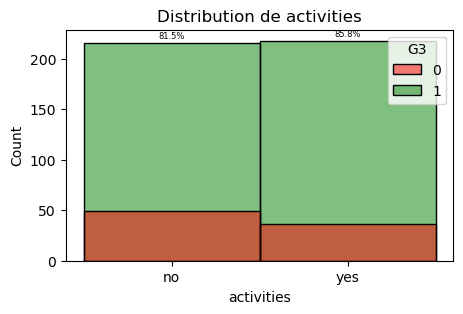

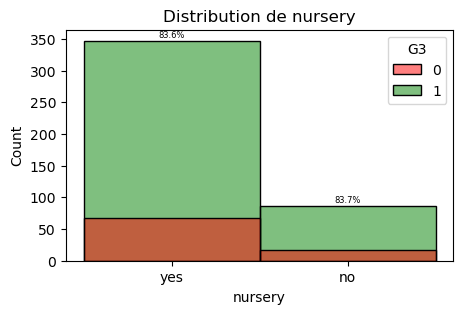

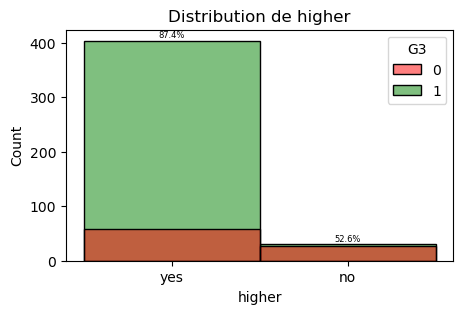

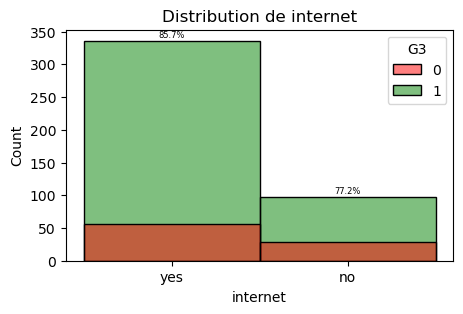

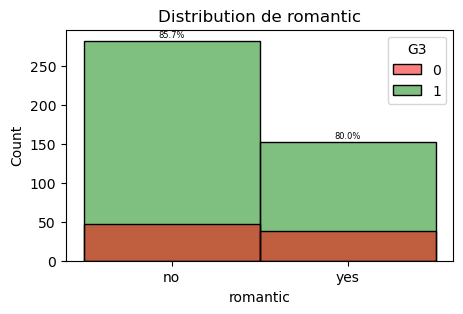

In [1645]:
analyseFeature_Target('object')

**Shape analysis :**
- **Target :** In our model the targer will be G3 which is the final courses grade. If it >= 10 then the student has passed the course if not the student has failed. We will try a model including G1 and G2 which are the first and second semester grades and a model without them (More interesting)
- **Lines et columns** : Mat : 395 rows, 33 features and POR : 649 rows, 33 features, BOTH FEATURES ARE THE SAME
- **Feature types** : int64 = 16, object = 17
- **Missing values** : NO missing values

**Background analysis**:
- **Target visualisation** :
  - Validate : 83% of students has passed the course and 17% have failed
- **Features analysis** :
  1. Numeric Features :
     - The majority of int variables are Categoric variables except **Age and abscences**. All the cat variables need some feature engineering to better understand them. We could explore them in comparison to the semester notes to try to see some patterns or insights we could use to modify them.
     - The vast majority of student have between 15 to 18 years old. The other may have repassed 1 year or more. Could be intersting to add a feature repassed and compare the results of people under 18 and above 18.
     - The vast majority of student don't have absences. Could be interesting to comapre the grades in function of the absences.
  3.  Categoric Features :
     - More student from GP school than MP school. Could be interesting to compare their results
     - Almost the same number of female / male. Could be interesting to compare their results
     - More urban student than rural could be interesting to compare their results
     -  More family with a siez  <= 3 than family with size > 3
     -  A lot more of parents living together than apart
     -  More parents working in others. More mother teacher than fathers
     -  Main reason of choosing this school is course then home distance and reputation. Could be intersting to compare this for the 2 schools.
     -  Quit the same proportion of guardian between father / mother and other
     -  Majority has'nt extra school support. Intersting to compare the results
     -  The mother is majoritarly the guardian. 
     -  There a few student having Extra class paid in the course subject ~ 50 vs 450
     -  Equivalent number or student that have or nor extra activities. 
     -  Majority of student attented nusrery school
     -  Majority of student want to take higher education, could be intersting to see if it has an impact on the results
     -  Majority of student have acccess to internet at home.
     -  Majority of student are not in a romantic relationship.

- **Relation Features / Target** :
    1. Numeric features :
         - 1st Semester : majority of notes between 9 - 15
         - 2nd Semester ; majority of notes between 9 - 13 => worst thant 1st Semester
         - The student that have parents with primary eduction seems to have more fail class (72%), altough surprisingly student with parents with no education have all passed the exam but they are really not many. The rest is above 82/83%
         - When travel time increase the passing rate decrease from 85% to 76-80%
         - Clearly those who studied the most have a higher passing rate (92%) against only 76% passing rate for those who have studied 1hour/week
         - Those who already failed a past class have a really higher fail rate in the portugese class (50% vs 90%). This faeture seems to be really important. 
         - Those who have a really bad relation with their family (low people) have a really bad passing rate (52%) againt +80% for others
         - When free time increase, slightly more people fail their exam, with only 70% of passing rate for those with a really high free time.
         - People with 1 hour of go out have only a 66% pass rate while those with more than 5 hours have a pass rate of 75%. The others between 1 and 5 hours have a pass rate around 80% or more
         - Those with a workday alchol consumption high have a lower pass rate (68% vs 80%+)
         - For week-end alchol consumption it is less visible with only those who drinks a lot that have a lower pass rate (75%)
         - The health status doeasn't seem to have a important influence on the pass rate since every class has a 80%+ passing rate
         - Here we have clearly an outlier (+30h absence but still pass), otherway it doesn't seem to have a big impact on the passing rate
    3. Categoric features :
         - We can clearly see that school GP has a much higher passing rate than MS school (93% vs 67%)
         - Male / female passing rate is quite similar altough female is better (85.7% vs 81%)
         - Urban people tend to have a higher passing rate over the rural student : 86 vs 77 %
         - Family size doesn't seem to have a big impact on the passing rate : 82 vs 86% between <= 3 family number and > 3
         - The passing rate depending on the parent cohabitation status is equivalent 84%
         - We can clearly see that student that have a teacher mother have a very high passing rate (96%) while student with mother at home got the smallest passing rate (77%). Other jobs are quite equivalent (85%)
         - For the father it is the same for those who are teacher (91%) passing rate but we can notice that the passing rate is much higher for the student that got fathers at home (85,7%)
         - The passing rate is smaller for student that went to their school for other reason than (distance home, course and reputation : 70% vs 86/80/93%)
         - The guardian doesn't seeem to have an impact on the passing rate except when it is other (76%) maybe because of absent / dead parents ?
         - Passing rate is a little bit superior for student that got school support : 88% vs 83%
         - Nevertheless it's quite equal regarding the parent suppor or not (84% vs 82%)
         - Surprinsigly people that paid extra class in the course subject have a lower passing rate ( 78,8% vs 84% )
         - The passing rate is a little bit superior for student that have extr-curricular activities (86% vs 81.5%)
         - The passing rate is the same regarding if student attented nursery school or not (84%)
         - The passing rate is much higher for student that want to take higher education ( 87% vs 52%)
         - Passing rate is also higher for student that have access to internet (85% vs 77%)
         - Student with no romantic relation have a slightly better passing rate (85% vs 80%) 


**Key Insights**
After analyzing the distribution of all our features and their relation with the target : Passed or not the class we have gain some interesting insights that may sugere that some features have more impact on our target

1. **Academic and Motivational Factors:**
    - Intention to pursue higher education:
        - Students who plan to pursue higher education have a significantly higher pass rate (87% vs. 52%).
        - Key insight: Motivation is a critical factor.
    - Previous class failure:
        - Students who failed a previous class have a much lower pass rate in Portuguese (50% vs. 90% for those without failures).
        - Key insight: Academic history is highly predictive.
    - Study time:
        - Students studying more than 10 hours per week have a very high pass rate (92%), compared to 76% for those studying only 1 hour per week.
    - Grades from previous semesters:
        - A drop in performance is observed between the 1st and 2nd semesters (majority of grades: 9-15 vs. 9-13).
2. **Social and Environmental Factors:**
    - School attended:
        - The school has a significant impact: GP students have a 93% pass rate, compared to 67% for MS students.
    - Family relationships:
        - Students with poor family relationships have a very low pass rate (52%) compared to 80%+ for others.
    - Urban vs. rural location:
        - Urban students have a higher pass rate (86%) than rural students (77%).
    - Parental profession:
        -Students with teacher mothers have the highest pass rate (96%), while students with stay-at-home mothers have the lowest (77%). For fathers, teachers also have high results (91%).

3. **Personal Factors:**
    - Alcohol consumption:
        - High weekday alcohol consumption is associated with a lower pass rate (68% vs. 80%+).
    - Free time:
        - Excessive free time is slightly correlated with a lower pass rate (70% for high free time, compared to 80%+ for moderate free time).
    - Extracurricular activities:
        - Students participating in extracurricular activities have a better pass rate (86% vs. 81.5%).
    - Internet access:
        - Students with Internet access at home perform better (85% vs. 77%).


**Conclusion**

The EDA highlights that academic, motivational, and social factors play a crucial role in student success. Among the most important insights:
- **Academic history and motivation:**
  - The intention to pursue higher education and previous academic failures are highly predictive of success.
- **School and social environment:**
    - The school attended, family relationships, and parental profession strongly influence student performance.
- **Personal habits:**
    - Factors like study time, alcohol consumption, and Internet access demonstrate a secondary but notable impact.

CHI2 test for categorical features :

In [40]:
X_chi2_cat = data_por_original.copy()
X_chi2_cat = X_chi2_cat.drop(["G1", "G2", "G3"], axis=1)
target_chi2 = data_por_original["G3"]
target_chi2.shape

(519,)

In [41]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

pipeline_chi2 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SelectKBest(chi2)
)
pipeline_chi2.fit(X_chi2_cat, passed)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x0000029AB5C6EFC0>))])

In [42]:
pipeline_chi2.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x0000029AB5C6EFC0>))])>

In [43]:
scores = pipeline_chi2.named_steps['selectkbest'].scores_.round(2)
p_values = pipeline_chi2.named_steps['selectkbest'].pvalues_.round(6)
features_names = pipeline_chi2.named_steps['onehotencoder'].get_feature_names_out()

results = pd.DataFrame({'Feature': features_names, 'Chi2 Score': scores, 'P-value': p_values}).sort_values(by='Feature', ascending=True)
results = results[results["P-value"] <= 0.05]
results

,Feature,Chi2 Score,P-value
24,Fedu_1,11.85,0.000578
26,Fedu_3,6.35,0.011769
19,Medu_1,10.49,0.001202
22,Medu_4,6.38,0.011525
32,Mjob_teacher,5.96,0.014613
117,absences_14,4.95,0.026051
123,absences_24,5.11,0.023845
124,absences_26,5.11,0.023845
112,absences_9,4.95,0.026051
12,address_R,5.13,0.023562


# 3. Feature Engineering

- We are going to do some feature engineering :
    - We are going to use One-Hot-Encoding on the nominal features 
    - We are going to use Ordinal Encoding on the binary features
    - We are going to categorize the feature abscences with 2 groups : >= 10 and < 10
    - We are going to do the same for the feature Age with the groups <= 18 and > 18
    - We are going to let the others numeric features has they are since they already are categoric

In [46]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [1658]:
class AbsenceEncoding(BaseEstimator, TransformerMixin):
    """
    This class is a custom Transformer. It will modify the asbcence feature of our data set.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Vérification que X est un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformation : absences > 10 devient une variable booléenne
        X_transformed = X.copy()
        X_transformed["absences"] = X_transformed["absences"] > 10
        return X_transformed[["absences"]]

    def get_feature_names_out(self, names=None):
        return ["absences"]

In [1660]:
class AgeEncoding(BaseEstimator, TransformerMixin):
    """
    This class is a custom Transformer. It will modify the age feature of our data set.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Vérification que X est un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformation : absences > 10 devient une variable booléenne
        X_transformed = X.copy()
        X_transformed["age"] = X_transformed["age"] <= 18
        return X_transformed[["age"]]

    def get_feature_names_out(self, names=None):
        return ["age"]


In [1662]:
preprocessing = ColumnTransformer([
    ("nominal", OneHotEncoder(), ["Mjob","Fjob","reason","guardian"]),
    ("binary", OrdinalEncoder(), ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup", "paid",
                                 "activities", "nursery", "higher", "internet", "romantic"]),
    ("absence", AbsenceEncoding(), ["absences"]),
    ("age", AgeEncoding(), ["age"])
], remainder='passthrough')

In [1664]:
# Our preprocessing pipeline seems to work well
test_train = preprocessing_trees.fit_transform(X_train_por)
preprocessing_trees.get_feature_names_out()

array(['nominal__Mjob_at_home', 'nominal__Mjob_health',
       'nominal__Mjob_other', 'nominal__Mjob_services',
       'nominal__Mjob_teacher', 'nominal__Fjob_at_home',
       'nominal__Fjob_health', 'nominal__Fjob_other',
       'nominal__Fjob_services', 'nominal__Fjob_teacher',
       'nominal__reason_course', 'nominal__reason_home',
       'nominal__reason_other', 'nominal__reason_reputation',
       'nominal__guardian_father', 'nominal__guardian_mother',
       'nominal__guardian_other', 'binary__school', 'binary__sex',
       'binary__address', 'binary__famsize', 'binary__Pstatus',
       'binary__schoolsup', 'binary__famsup', 'binary__paid',
       'binary__activities', 'binary__nursery', 'binary__higher',
       'binary__internet', 'binary__romantic', 'absence__absences',
       'age__age', 'remainder__Medu', 'remainder__Fedu',
       'remainder__traveltime', 'remainder__studytime',
       'remainder__failures', 'remainder__famrel', 'remainder__freetime',
       'remainder__goou

# **4. Exploring some models**

We are going to explore some models and see how they perform.

The models we are going to test are : 
- Logistic_Regression
- KNeighbors Classifier
- Decision_Tree Classifier
- RandomForest Classifier
- GradientBoosting Classifier
- Ada_Boost Classifier
- SVC Classifier

In [1667]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1300]:
# We make a copy of our training and test set with and without the features G1 and G2

X_train_por_without = X_train_por.drop(["G1", "G2"], axis=1).copy()
X_test_por_without = X_test_por.drop(["G1", "G2"], axis=1).copy()
X_train_por_with = X_train_por.copy()
X_test_por_with = X_test_por.copy()

In [1302]:
# We use our preprocessing pipeline on our training set without G1 and G2
X_train_ = preprocessing.fit_transform(X_train_por_without)

In [1485]:
# We create the target y_train which is equal to 1 if the student has a higher or equal grade than 10 and 0 if not
y_train_por_ = (y_train_por >= 10).astype(int)
y_train_por_.value_counts(normalize=True)

G3
1     0.836224
0     0.163776
Name: proportion, dtype: float64

In [1487]:
# We create 5 Stratified fold which means that each fold have the same proportion of target class values
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1489]:
# We create a shortlist of some Classifiers to test

classifiers = [
    ("Logistic_Regression", LogisticRegression(max_iter=1000, class_weight='balanced')),
    ("SGD", SGDClassifier(random_state=42)),
    ("KNeighbors", KNeighborsClassifier()),
    ("Decision_Tree", DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")),
    ("RandomForest", RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(max_depth=3, random_state=42)),
    ("Ada_Boost", AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")),
    ("SVC", SVC(class_weight="balanced"))
]

In [1491]:
# We create a function to grade each classfiers we get on parameters based on their accuracy, precision, recall and f1 score
# We use cross-validation over the Stratified K fold

def modelGrading(clfs,X_grad ,y_grad):
    # Metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    for name, clf in clfs:
        cv_results = cross_validate(clf, X_grad, y_grad.to_numpy().ravel(), cv=cv, scoring=scoring)
        y_train_pred = cross_val_predict(clf, X_grad, y_grad.to_numpy().ravel(), cv=cv)
        print(f"\n{name} -------")
        for metric in scoring:
            mean = cv_results[f'test_{metric}'].mean()
            std = cv_results[f'test_{metric}'].std()
            print(f" {metric.capitalize()} = {mean:.4f} (+/- {std:.4f})")
        #for metric in scoring:
         #   print(f" {metric.capitalize()}: {cv_results['test_' + metric].mean():.4f} (+/- {cv_results['test_' + metric].std():.4f})")
        #print(f"Accuracy = {round(accuracy_score(y_train_, y_train_pred),3)}")
        #print(f"Precision = {precision_score(y_train_, y_train_pred).round(3)}")
        #print(f"Recall = {recall_score(y_train_, y_train_pred).round(3)}")
        #print(f"f1-Score = {f1_score(y_train_, y_train_pred).round(3)}")
        print(f"Confusion Matrix = {confusion_matrix(y_grad, y_train_pred)}")

In [1493]:
modelGrading(classifiers, X_train_, y_train_por_)


Logistic_Regression -------
 Accuracy = 0.7668 (+/- 0.0264)
 Precision = 0.9269 (+/- 0.0217)
 Recall = 0.7833 (+/- 0.0254)
 F1 = 0.8488 (+/- 0.0180)
Confusion Matrix = [[ 58  27]
 [ 94 340]]

SGD -------
 Accuracy = 0.7707 (+/- 0.0944)
 Precision = 0.8917 (+/- 0.0492)
 Recall = 0.8408 (+/- 0.1749)
 F1 = 0.8497 (+/- 0.0850)
Confusion Matrix = [[ 35  50]
 [ 69 365]]

KNeighbors -------
 Accuracy = 0.8420 (+/- 0.0239)
 Precision = 0.8550 (+/- 0.0137)
 Recall = 0.9770 (+/- 0.0163)
 F1 = 0.9118 (+/- 0.0133)
Confusion Matrix = [[ 13  72]
 [ 10 424]]

Decision_Tree -------
 Accuracy = 0.7765 (+/- 0.0381)
 Precision = 0.9308 (+/- 0.0214)
 Recall = 0.7927 (+/- 0.0527)
 F1 = 0.8549 (+/- 0.0286)
Confusion Matrix = [[ 59  26]
 [ 90 344]]

RandomForest -------
 Accuracy = 0.8400 (+/- 0.0119)
 Precision = 0.8517 (+/- 0.0069)
 Recall = 0.9792 (+/- 0.0087)
 F1 = 0.9110 (+/- 0.0067)
Confusion Matrix = [[ 11  74]
 [  9 425]]

GradientBoosting -------
 Accuracy = 0.8343 (+/- 0.0163)
 Precision = 0.8692 

**Performance Overview :**

The initial evaluation of algorithms shows promising results, but there are clear differences in their ability to handle the imbalanced nature of our dataset. Let’s break it down:

We can see that based on **Accuracy** the top-performing algorithms are : 
- KNeighbors (84,2%),
- Random Forest(84%),
- GradientBoosting(83,4%),
- ADA_Boost (83%)

At first glance, these accuracy values look quite good. However our dataset is *highly unbalanced* (~83% Passed, ~17% Failed) so Accuracy is not a reliable metric since a model could achieve high accuracy simply by predicting that most students have passed. For example a model that classify all students as 'passed' will still achieve 83% accuracy whil completely failing to identify the one's that failed. 

When we look at the confusion matrix of these algorithm's we can clearly see that they didn't manage to detect correctly the student thaat failed. For example The random Forest only detects 11 student that failed and missclasified as False Positive 74 of them. In the same time it detects correctly 425 stuent that passed and missclassied has false negative only 9 of them. So clearly this algorithm learn how to detect the positive students but not the negative ones. The same happens with KNeighbors, GradientBoosting and ADA_Boost :

For instance this is what a confusion matrix highlights : 
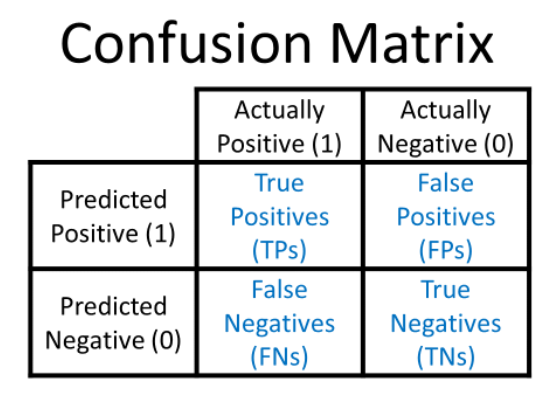

- The **Precision** reflects the *accuracy of the positive predictions*, it is equal to True **Positive / (True Positive + False Positive)**

- The **Recall** is the *ratio of positive instances that are correctly detected*, it is equal to **True Positive / ( True Positive + False Negative)**

- The **F1 score** is the *harmonic mean of precision and recall*, it is equal to **2 x ( precision x recall) / ( precision + recall)**

Here are the values of this metrics for the algorithms whith the higher accuracy :

- **RandomForest** 
    - Precision = 0.8517 (+/- 0.0069)
    - Recall = 0.9792 (+/- 0.0087)
    - F1 = 0.9110 (+/- 0.0067)
    - Confusion Matrix =  [[ 11  74][  9 425]]

 
- **KNeighbors**
    - Precision = 0.8550 (+/- 0.0137)
    - Recall = 0.9770 (+/- 0.0163)
    - F1 = 0.9118 (+/- 0.0133)
    - Confusion Matrix = [[ 13  72][ 10 424]]
      

- **GradientBoosting**
    - Precision = 0.8692 (+/- 0.0182)
    - Recall = 0.9447 (+/- 0.0089)
    - F1 = 0.9052 (+/- 0.0083)
    - Confusion Matrix = [[ 23  62][ 24 410]]
      

- **Ada_Boost** 
    - Precision = 0.8739 (+/- 0.0254)
    - Recall = 0.9331 (+/- 0.0224)
    - F1 = 0.9021 (+/- 0.0139)
    - Confusion Matrix = [[ 26  59][ 29 405]]

**Key Observations**
- Precision is Crucial: Given that our goal is to minimize False Positives (students incorrectly identified as having passed), we should focus more on Precision rather than Accuracy or Recall alone. This will help reduce the number of students incorrectly classified as "passed."

- Challenges with Detecting Failures: None of these algorithms, without further tuning, balances the detection of both classes effectively. They heavily favor detecting students who passed but struggle significantly with students who failed.

- Potential Solution — Combining Algorithms:
We see an opportunity to combine algorithms:
    - Use a model like Random Forest or KNeighbors to handle the positive class (students who passed) due to their high recall and precision in this class.
    - Use another model, such as SVM, for the negative class (students who failed), as these model perform relatively better at identifying failures.

**Next Steps :**
1. We can try to use Oversampling or undersampling to balance the classes
2. If we still have bad results then we could try to select an algorithm to detect the positive cases and another one to select the negatives cases, combine them and analyze the results
3. We then will fine-tune and optimize our final algorithm, selecting for example only the k best features
4. We will evaluate the final model and test it on the test 

# 5. **Optimization**

First we are going to oversample our minority class (Failed) since our two classes are really unbalanced.

In [526]:
from imblearn.over_sampling import SMOTE

In [676]:
# We are going to use over sampling on the minority class (Student failed)

smote = SMOTE(random_state=42, sampling_strategy='minority')

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_, y_train_por_)

In [678]:
X_train_oversampled.shape

(868, 43)

In [680]:
y_train_oversampled.shape

(868, 1)

In [682]:
# Let's look at the result we got after over sampling : 

modelGrading(classifiers, X_train_oversampled, y_train_oversampled)


Logistic_Regression -------
 Accuracy = 0.7972 (+/- 0.0147)
 Precision = 0.8063 (+/- 0.0209)
 Recall = 0.7833 (+/- 0.0229)
 F1 = 0.7943 (+/- 0.0148)
Confusion Matrix = [[352  82]
 [ 94 340]]

SGD -------
 Accuracy = 0.7396 (+/- 0.0417)
 Precision = 0.7700 (+/- 0.1318)
 Recall = 0.7719 (+/- 0.1823)
 F1 = 0.7381 (+/- 0.0738)
Confusion Matrix = [[307 127]
 [ 99 335]]

KNeighbors -------
 Accuracy = 0.7753 (+/- 0.0244)
 Precision = 0.9921 (+/- 0.0097)
 Recall = 0.5553 (+/- 0.0505)
 F1 = 0.7106 (+/- 0.0406)
Confusion Matrix = [[432   2]
 [193 241]]

Decision_Tree -------
 Accuracy = 0.8675 (+/- 0.0119)
 Precision = 0.8737 (+/- 0.0122)
 Recall = 0.8595 (+/- 0.0220)
 F1 = 0.8663 (+/- 0.0130)
Confusion Matrix = [[380  54]
 [ 61 373]]

RandomForest -------
 Accuracy = 0.9297 (+/- 0.0113)
 Precision = 0.9154 (+/- 0.0111)
 Recall = 0.9470 (+/- 0.0174)
 F1 = 0.9308 (+/- 0.0114)
Confusion Matrix = [[396  38]
 [ 23 411]]

GradientBoosting -------
 Accuracy = 0.9170 (+/- 0.0095)
 Precision = 0.9164 

After balancing the dataset using oversampling, we evaluated the same algorithms than before without any fine-tuning. We observe really intersting things :
- The **accuracy** increases a lot for almost all the models. The bests are the **ensemble algorithms** :
    - **Random Forest** : Accuracy = 0.9297 (+/- 0.0113)
    - **GradientBoosting** : Accuracy = 0.9170 (+/- 0.0095)
    - **Ada Boost** : Accuracy = 0.8963 (+/- 0.0173)
- In comparison with before where this algorithms were'nt able to correctly detect the failed students, Here the precision is really high as well as the recall and the F1 score. The confusion matrix for these algorithms illusrate it very well :
    - **RandomForest** 
        - Precision = 0.9154 (+/- 0.0111)
        - Recall = 0.9470 (+/- 0.0174)
        - F1 = 0.9308 (+/- 0.0114)
        - Confusion Matrix = [[396  38][ 23 411]]

    - **GradientBoosting**
        - Precision = 0.9164 (+/- 0.0254)
        - Recall = 0.9193 (+/- 0.0243)
        - F1 = 0.9173 (+/- 0.0090)
        - Confusion Matrix = [[397  37][ 35 399]]

    - **Ada_Boost**
        - Precision = 0.8794 (+/- 0.0228)
        - Recall = 0.9193 (+/- 0.0243)
        - F1 = 0.8986 (+/- 0.0169)
        - Confusion Matrix = [[379  55][ 35 399]]
- An interesting thing to pount out is that the K-Nearest Neighbours algorithms has predict almost all the failed students correclty. 

Since here, we are going to work with only 3 models we have tested before : Random Forest, GradientBoosting and SVC. 
Why this choice ? Because RandomForest and Gradient Boosting are the two best one's but adding the Ada Boost (which is the thirs one) won't make a lot of sense since it's also a ensemble of trees. So let's try to fine-tune a different type of algorithm in this case a support vector machine (SVC) for classification.

**Tuning the best models :** 

In [942]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

In [788]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1495]:
# The params we are going to tune
weights = {0: 2.0, 1: 1.0}
params_rnd= {
    "n_estimators": [150, 200, 250],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2],
    "min_samples_leaf": [1,2,5],
    "class_weight": [weights]
}

params_boosting = {
    "n_estimators": [190],
    "learning_rate": [0.06],
    "max_depth": [3],
    "min_samples_split": [2],
    "min_samples_leaf": [2]
}

params_SVC = {
    "C": [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

In [1497]:
# The metrics on weach we are going to evaluate the model
score = {
    'accuracy': 'accuracy',
    "precision": 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [1499]:
def gridSearch(params, clf, metric):
    grid_search = GridSearchCV(clf, param_grid=params, 
                               cv=cv, scoring=score, refit=metric, 
                               verbose=2)
    grid_search.fit(X_train_oversampled, y_train_oversampled.to_numpy().ravel())
    print("Best parameters : ", grid_search.best_params_)
    print(f"Best {metric} : ", grid_search.best_score_)    
    cv_results = grid_search.cv_results_
    print("Mean accuracy:", cv_results['mean_test_accuracy'].mean())
    print("Mean precision :", cv_results['mean_test_precision'].mean())
    print("Mean recall :", cv_results['mean_test_recall'].mean())
    print("Mean F1-score:", cv_results['mean_test_f1'].mean())

    return grid_search

In [1501]:
grid_rnd = gridSearch(params_rnd, RandomForestClassifier(), 'accuracy')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight={0: 2.0, 1: 1.0}, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class

In [1503]:
grid_boosting = gridSearch(params_boosting, GradientBoostingClassifier(), 'precision')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   0.8s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   0.6s
Best parameters :  {'learning_rate': 0.06, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 190}
Best precision :  0.9221472585147564
Mean accuracy: 0.9205102650986646
Mean precision : 0.9221472585147564
Mean recall : 0.9192996524993318
Mean F1-score: 0.920479722675976


In [1505]:
grid_SVC = gridSearch(params_SVC, SVC(), 'precision')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

After some optimization we found the following results for our 3 models :
- **RandomForest**
    - Best parameters :
        -  'max_depth': 10,
        -  'min_samples_split': 2
        -  'n_estimators': 100
    - Best F1 Score = 94%
- **Gradient Boosting**
    - Best parameters :
        - 'learning_rate': 0.01
        - 'max_depth': 3
        - 'n_estimators': 500
    - Best F1 Score = 91.75%
- **SVC**
    - Best parameters :
        - 'C': 100
        - 'gamma': 'scale'
        - 'kernel': 'rbf'
    - Best F1 Score = 93.97%

In [1507]:
final_models = [   
    ("RandomForest", grid_rnd.best_estimator_),
    ("GradientBoosting", grid_boosting.best_estimator_),
    ("SVC", grid_SVC.best_estimator_)
]

**Select K-best features**

Now let's see if we can optimize more our models. For now we have 43 features which is quit a lot. Let's try to reduce it and see if it improves our models results. 

For this we will use the scikit-learn function *SelectFromModel* with our optimize RandomForestClassifier as estimator.

In [944]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [1517]:
selector = SelectFromModel(grid_rnd.best_estimator_, max_features=12, importance_getter="feature_importances_", threshold=-np.inf)

In [1519]:
X_train_oversampled.shape

(868, 43)

In [1521]:
y_train_oversampled.shape

(868, 1)

Let's run a **RandomizedSearchCV** to find the best number of features

In [974]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [1529]:
pipeline_randomized = Pipeline([
    ("selector",SelectFromModel(grid_rnd.best_estimator_, max_features=20, importance_getter="feature_importances_")),
    ("model", grid_rnd.best_estimator_)
])

In [1531]:
params = {
    "selector__estimator__max_features": randint(1,43)
}

score = {
    'accuracy': 'accuracy',
    "precision": 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

#model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rnd_search = RandomizedSearchCV(pipeline_randomized, param_distributions=params, n_iter=10,cv=cv, scoring=score, refit='f1', verbose=2)
rnd_search.fit(X_train_oversampled, y_train_oversampled.to_numpy().ravel())
#modelGrading(classifiers,X_train_2, y_train_)
print("Best parameters : ", rnd_search.best_params_)
print("Best F1 score : ", rnd_search.best_score_)

cv_results = rnd_search.cv_results_
print("Mean accuracy:", cv_results['mean_test_accuracy'].mean())
print("Mean precision :", cv_results['mean_test_precision'].mean())
print("Mean recall :", cv_results['mean_test_recall'].mean())
print("Mean F1-score:", cv_results['mean_test_f1'].mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............selector__estimator__max_features=15; total time=   1.0s
[CV] END ...............selector__estimator__max_features=15; total time=   1.0s
[CV] END ...............selector__estimator__max_features=15; total time=   1.0s
[CV] END ...............selector__estimator__max_features=15; total time=   1.0s
[CV] END ...............selector__estimator__max_features=15; total time=   0.6s
[CV] END ................selector__estimator__max_features=8; total time=   0.6s
[CV] END ................selector__estimator__max_features=8; total time=   0.6s
[CV] END ................selector__estimator__max_features=8; total time=   0.6s
[CV] END ................selector__estimator__max_features=8; total time=   0.7s
[CV] END ................selector__estimator__max_features=8; total time=   0.8s
[CV] END ...............selector__estimator__max_features=38; total time=   1.5s
[CV] END ...............selector__estimator__max

Well, it seems that reducing the number of faetures doesn't improve the performance of our model. So we won't use it.

# 7. **Evaluating Our Models**

We are now going to evaluate our models on the **test set**.

Here are our final models : 

In [1579]:
final_Models = [   
    grid_rnd.best_estimator_,
    grid_boosting.best_estimator_,
    grid_SVC.best_estimator_
]

names = ["Random Forest", "Gradient Boosting", "SVC"]

In [1571]:
X_train = X_train_por.drop(["G1", "G2"], axis=1).copy()
X_test = X_test_por.drop(["G1", "G2"], axis=1).copy()
y_train = (y_train_por >= 10).astype(int)
y_test = (y_test_por >= 10).astype(int)

In [1573]:
from imblearn.pipeline import Pipeline
train_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("oversampling", SMOTE(random_state=42, sampling_strategy='minority'))
])

In [1582]:
def evaluation(X_train, y_train, X_test, y_test):
    X_train, y_train = train_pipeline.fit_resample(X_train, y_train)

    
    for clf in final_Models:
        clf.fit(X_train, y_train.to_numpy().ravel())

    X_test = preprocessing.transform(X_test)

    predictions = []
    for clf in final_Models:
            predictions.append(clf.predict(X_test))

    for predi, name in zip(predictions, names):
        evaluate_model(y_test, predi, name)


def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance :")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [1584]:
evaluation(X_train, y_train, X_test, y_test)


Random Forest Performance :
Accuracy : 0.8769
Precision: 0.8898
Recall   : 0.9826
F1 Score : 0.9339
Confusion Matrix:
[[  1  14]
 [  2 113]]

Gradient Boosting Performance :
Accuracy : 0.9154
Precision: 0.9262
Recall   : 0.9826
F1 Score : 0.9536
Confusion Matrix:
[[  6   9]
 [  2 113]]

SVC Performance :
Accuracy : 0.8615
Precision: 0.9292
Recall   : 0.9130
F1 Score : 0.9211
Confusion Matrix:
[[  7   8]
 [ 10 105]]


Now let's see the results we get with G1 and G2 columns

In [1586]:
evaluation(X_train_por, y_train, X_test_por, y_test)


Random Forest Performance :
Accuracy : 0.9231
Precision: 0.9565
Recall   : 0.9565
F1 Score : 0.9565
Confusion Matrix:
[[ 10   5]
 [  5 110]]

Gradient Boosting Performance :
Accuracy : 0.9154
Precision: 0.9561
Recall   : 0.9478
F1 Score : 0.9520
Confusion Matrix:
[[ 10   5]
 [  6 109]]

SVC Performance :
Accuracy : 0.9000
Precision: 0.9397
Recall   : 0.9478
F1 Score : 0.9437
Confusion Matrix:
[[  8   7]
 [  6 109]]


Now for the matematic class :

In [1593]:
X_train_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [1595]:
X_train = X_train_mat.drop(["G1", "G2"], axis=1).copy()
X_test = X_test_mat.drop(["G1", "G2"], axis=1).copy()
y_train = (y_train_mat >= 10).astype(int)
y_test = (y_test_mat >= 10).astype(int)

Without G1 and G2 class

In [1597]:
evaluation(X_train, y_train, X_test, y_test)


Random Forest Performance :
Accuracy : 0.7089
Precision: 0.7101
Recall   : 0.9423
F1 Score : 0.8099
Confusion Matrix:
[[ 7 20]
 [ 3 49]]

Gradient Boosting Performance :
Accuracy : 0.6835
Precision: 0.7213
Recall   : 0.8462
F1 Score : 0.7788
Confusion Matrix:
[[10 17]
 [ 8 44]]

SVC Performance :
Accuracy : 0.6835
Precision: 0.7288
Recall   : 0.8269
F1 Score : 0.7748
Confusion Matrix:
[[11 16]
 [ 9 43]]


With G1 and G2 class

In [1599]:
evaluation(X_train_mat, y_train, X_test_mat, y_test)


Random Forest Performance :
Accuracy : 0.8987
Precision: 0.9583
Recall   : 0.8846
F1 Score : 0.9200
Confusion Matrix:
[[25  2]
 [ 6 46]]

Gradient Boosting Performance :
Accuracy : 0.8987
Precision: 0.9583
Recall   : 0.8846
F1 Score : 0.9200
Confusion Matrix:
[[25  2]
 [ 6 46]]

SVC Performance :
Accuracy : 0.9241
Precision: 0.9423
Recall   : 0.9423
F1 Score : 0.9423
Confusion Matrix:
[[24  3]
 [ 3 49]]


# **8. Conclusion**

This project aimed to analyze the factors influencing students' academic performance in two subjects, mathematics and Portuguese, using a range of socio-economic, academic, and behavioral explanatory variables. The ultimate goal was to build models capable of predicting the final grade (G3) and to explore performance differences under various configurations.

**Key Results:**
- Model Performance:
    - The Random Forest, Gradient Boosting, and Support Vector Classifier (SVC) models were tested.
    - With the inclusion of intermediate grades (G1 and G2), the models achieved high performance, notably:
        - Random Forest: **Accuracy = 0.98, Precision = 0.95, Recall = 0.88, F1-Score = 0.92.**
        - Gradient Boosting: **Accuracy = 0.98, Precision = 0.95, Recall = 0.88, F1-Score = 0.92.**
        - SVC: **Accuracy = 0.92, Precision = 0.94, Recall = 0.94, F1-Score = 0.94.**


- **Impact of Variables G1 and G2:**
    - Including intermediate grades (G1 and G2) significantly improved model performance, highlighting their importance in predicting final grades (G3).
    - When these variables were excluded, the overall performance of the models dropped significantly, with accuracy scores falling to approximately 70%.

- **Minority Class Handling with Oversampling:**
    - The use of SMOTE (Synthetic Minority Oversampling Technique) effectively addressed class imbalance, improving precision for minority classes.

**Key Contributions:**
- Rigorous data analysis, including exploration of relationships between categorical and continuous variables, provided better insights into the factors influencing academic performance.
- The results showed that intermediate grades are key predictors, but other factors such as absences, study time, and prior academic failure also play a significant role.
- The methodology, combining preprocessing pipelines, oversampling, and robust models, offers a reliable and replicable solution to this type of problem.


**Future Perspectives:**

This project demonstrates the potential of machine learning models to effectively predict academic performance. In the future, it would be interesting to incorporate time series analysis to study the evolution of performance over time or to explore advanced techniques such as neural networks to further enhance the results.